In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.interpolate as interpolate

import Bai2b 

RECORDS_PER_HOUR = 12


In [95]:

# dx
def dx(T_Air, T_Out, v_Wind):
    # cap_CO2_Air     = float(input('Enter cap_CO2_Air     : '))
    # cap_CO2_Top     = float(input('Enter cap_CO2_Top     : '))
    # eta_HeatCO2     = float(input('Enter eta_HeatCO2     : '))
    # U_Blow          = float(input('Enter U_Blow          : '))
    # P_Blow          = float(input('Enter P_Blow          : '))
    # A_Flr           = float(input('Enter A_Flr           : '))
    # U_ExtCO2        = float(input('Enter U_ExtCO2        : '))
    # phi_ExtCO2      = float(input('Enter phi_ExtCO2      : '))
    # U_Pad           = float(input('Enter U_Pad           : '))
    # phi_Pad         = float(input('Enter phi_Pad         : '))
    # CO2_Out         = float(input('Enter CO2_Out         : '))
    # U_ThScr         = float(input('Enter U_ThScr         : '))
    # K_ThScr         = float(input('Enter K_ThScr         : '))
    # diff_T_AirTop   = float(input('Enter diff_T_AirTop   : '))
    # g               = float(input('Enter g               : '))
    # diff_rho_AirTop = float(input('Enter diff_rho_AirTop : '))
    # C_d             = float(input('Enter C_d             : '))
    # U_Roof          = float(input('Enter U_Roof          : '))
    # U_Side          = float(input('Enter U_Side          : '))
    # A_Roof          = float(input('Enter A_Roof          : '))
    # A_Side          = float(input('Enter A_Side          : '))
    # h_SideRoof      = float(input('Enter h_SideRoof      : '))   
    # C_w             = float(input('Enter C_w             : '))
    # zeta_InsScr     = float(input('Enter zeta_InsScr     : '))
    # c_leakage       = float(input('Enter c_leakage       : '))
    # eta_Side        = float(input('Enter eta_Side        : '))
    # eta_Side_Thr    = float(input('Enter eta_Side_Thr    : '))
    # U_ThScr         = float(input('Enter U_ThScr         : '))
    # U_VentForced    = float(input('Enter U_VentForced    : '))
    # phi_VentForced  = float(input('Enter phi_VentForced  : '))
    # M_CH2O          = float(input('Enter M_CH2O          : '))
    # h_CBuf          = float(input('Enter h_CBuf          : '))
    # Res             = float(input('Enter Res             : '))
    # h_Roof          = float(input('Enter h_Roof          : '))
    # eta_Roof        = float(input('Enter eta_Roof        : '))
    # eta_Roof_Thr    = float(input('Enter eta_Roof_Thr    : '))
    
    cap_CO2_Air     = 4.7
    cap_CO2_Top     = 0.97
    CO2_Out         = 668
    g               = 9.81
    P_Blow          = 500000
    
    A_Flr           = 78000
    A_Roof          = 0.18
    A_Side          = 0
    
    phi_ExtCO2      = 430000
    phi_Pad         = 0
    phi_VentForced  = 0
    
    
    diff_T_AirTop   = 1
    diff_rho_AirTop = 0.1
    
    K_ThScr         = 0.00025
    C_d             = 0.65
    C_w             = 0.09
    zeta_InsScr     = 1
    c_leakage       = 0.0001
    
    eta_HeatCO2     = 0.057
    eta_Side        = 0
    eta_Side_Thr    = 0.9
    eta_Roof        = 1
    eta_Roof_Thr    = 0.9
    
    M_CH2O          = 0.03
    h_CBuf          = 1
    Res             = 1.25
    
    h_SideRoof      = cap_CO2_Air / 2
    h_Roof          = cap_CO2_Top
    
    U_Blow          = 0.5
    U_ExtCO2        = 0.5
    U_Pad           = 0.5
    U_ThScr         = 0.5
    U_Roof          = 0.5
    U_Side          = 0.5
    U_ThScr         = 0.5
    U_VentForced    = 0.5
    
    rho_Mean_Air    = 101100 / (287.05 + T_Air)
    diff_T_AirOut   = T_Air - T_Out
    T_Mean_Air      = (T_Air + T_Out) / 2
    
    BlowAir         = np.array([0, 0, Bai2b.MC_BlowAir(eta_HeatCO2, U_Blow, P_Blow, A_Flr)])
    ExtAir          = np.array([0, 0, Bai2b.MC_ExtAir(U_ExtCO2, phi_ExtCO2, A_Flr)])
    PadAir          = Bai2b.MC_PadAir_Lin(U_Pad, phi_Pad, A_Flr, CO2_Out)
    f_ThermalScr    = Bai2b.f_ThScr(U_ThScr, K_ThScr, diff_T_AirTop, g, rho_Mean_Air, diff_rho_AirTop)
    AirTop          = Bai2b.MC_AirTop_Lin(f_ThermalScr)
    f_VentRoofSide_ = Bai2b.f_VentRoofSide(C_d, A_Flr, U_Roof, U_Side, A_Roof, A_Side, g, h_SideRoof, diff_T_AirOut, T_Mean_Air, C_w, v_Wind)
    f_VentRoofSide0 = Bai2b.f_VentRoofSide(C_d, A_Flr, U_Roof, U_Side, 0, A_Side, g, h_SideRoof, diff_T_AirOut, T_Mean_Air, C_w, v_Wind)
    eta_InsulScr    = Bai2b.eta_InsScr(zeta_InsScr)
    f_Leakage       = Bai2b.f_leakage(v_Wind, c_leakage)
    f_VentSide_     = Bai2b.f_VentSide(eta_Side, eta_Side_Thr, eta_InsulScr, f_VentRoofSide0, f_VentRoofSide_, U_ThScr, f_Leakage)
    f_VentForced_   = Bai2b.f_VentForced(eta_InsulScr, U_VentForced, phi_VentForced, A_Flr)
    AirOut          = Bai2b.MC_AirOut_Lin(f_VentSide_, f_VentForced_, CO2_Out)
    P               = Bai2b.Photo_Lin(Res)
    AirCan          = Bai2b.MC_AirCan_Lin(M_CH2O, h_CBuf, P)
    ff_VentRoof_    = Bai2b.ff_VentRoof(C_d, U_Roof, A_Roof, A_Flr, g, h_Roof, diff_T_AirOut, T_Mean_Air, C_w, v_Wind)
    f_VentRoof_     = Bai2b.f_VentRoof(eta_Roof, eta_Roof_Thr, eta_Side, eta_InsulScr, ff_VentRoof_, U_ThScr, f_Leakage)
    TopOut          = Bai2b.MC_TopOut_Lin(f_VentRoof_, CO2_Out)

    result = np.array([(BlowAir + ExtAir + PadAir - AirOut - AirTop - AirCan) / cap_CO2_Air, (AirTop - TopOut) / cap_CO2_Top])    
    return result




In [97]:
def Euler(a, air, top, h, NumOfStep):
    t = 0
    i = 1
    AIR = 0
    TOP = 0
    while i <= NumOfStep:
        t += h
        AIR = air + h * a[0].dot([ air, top, 1 ])
        TOP = top + h * a[1].dot([ air, top, 1 ])
        air = AIR
        top = TOP
        i += 1
    return np.array([AIR, TOP])

def rk4(a, air, top, h, NumOfStep):
    t = 0
    i = 1
    AIR = 0
    TOP = 0
    while i <= NumOfStep:
        t += h
        k1 = a[0].dot([ air, top, 1 ])
        k2 = a[0].dot([ air+k1*h/2, top+k1*h/2, 1 ])
        k3 = a[0].dot([ air+k2*h/2, top+k2*h/2, 1 ])
        k4 = a[0].dot([ air+k3*h,   top+k3*h,   1 ])
        AIR = air + (k1 + 2*k2 + 2*k3 + k4)*h/6
        
        k1 = a[1].dot([ air, top, 1 ])
        k2 = a[1].dot([ air+k1*h/2, top+k1*h/2, 1 ])
        k3 = a[1].dot([ air+k2*h/2, top+k2*h/2, 1 ])
        k4 = a[1].dot([ air+k3*h,   top+k3*h,   1 ])
        TOP = top + (k1 + 2*k2 + 2*k3 + k4)*h/6
        
        air = AIR
        top = TOP
        i += 1
    return np.array([AIR, TOP])


In [91]:
gh_data = pd.read_csv('Greenhouse_climate.csv').fillna(method='pad').fillna(method='bfill')
gh_data

,AssimLight,BlackScr,CO2air,EnScr,GHtime,HumDef,PipeGrow,PipeLow,RHair,Tair,VentLee,Ventwind
0,0.0,0.0,438.000000,0.0,43326.000000,3.05,0.0,0.0,82.4,20.1,0.0,1.200000e+00
1,0.0,0.0,438.000000,0.0,43326.003472,3.05,0.0,0.0,82.4,20.1,0.0,1.200000e+00
2,0.0,0.0,438.000000,0.0,43326.006944,3.05,0.0,0.0,82.4,20.1,0.0,1.200000e+00
3,0.0,0.0,443.000000,0.0,43326.010417,3.00,0.0,0.0,82.9,20.3,0.0,0.000000e+00
4,0.0,0.0,429.000001,0.0,43326.013889,2.95,0.0,0.0,83.1,20.2,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
33128,0.0,95.0,475.000000,95.0,43441.027778,1.98,0.0,40.0,88.3,19.7,10.2,0.000000e+00
33129,0.0,95.0,480.000000,95.0,43441.031250,1.97,0.0,38.9,88.3,19.6,10.2,0.000000e+00
33130,0.0,95.0,477.000000,95.0,43441.034722,1.91,0.0,39.6,88.8,19.8,11.6,4.023313e-08
33131,0.0,95.0,481.999999,95.0,43441.038194,1.94,0.0,39.7,88.6,19.8,12.0,5.999999e-01


In [92]:
en_data = pd.read_csv('meteo.csv').fillna(method='pad').fillna(method='bfill')
en_data

,time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,8/14/2018,13.369189,0.0,0.0,-32.000000,0.0,0.000000e+00,87.8,17.7,32.0,3.2
1,8/14/2018,13.369189,0.0,0.0,-32.000000,0.0,0.000000e+00,87.8,17.7,32.0,3.2
2,8/14/2018,13.369189,0.0,0.0,-32.000000,0.0,0.000000e+00,87.8,17.7,32.0,3.2
3,8/14/2018,13.389380,0.0,0.0,-36.000000,0.0,0.000000e+00,87.4,17.8,32.0,3.2
4,8/14/2018,13.455197,0.0,1.0,-38.999999,0.0,0.000000e+00,87.3,17.9,32.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...
33128,12/7/2018,10.093596,0.0,0.0,-3.000000,0.0,1.000000e+00,96.7,11.6,32.0,9.8
33129,12/7/2018,10.093596,0.0,0.0,-2.000000,0.0,1.000000e+00,96.7,11.6,32.0,10.1
33130,12/7/2018,10.019657,0.0,0.0,-3.000000,0.0,9.999999e-01,96.6,11.5,32.0,10.1
33131,12/7/2018,10.083210,0.0,0.0,-2.000000,0.0,1.340000e-07,96.6,11.6,32.0,10.1


In [105]:

# See data for the next 2 hours
time_period = 7 * 24 * RECORDS_PER_HOUR

# ppm to mg/m3 and
# Celsius to Kelvin
data = pd.DataFrame({
    'CO2_Air' : gh_data.CO2air[:time_period] * 44 / 24.45,
    'T_Air' : gh_data.Tair[:time_period] + 273,
    'T_Out' : en_data.Tout[:time_period] + 273,
    'RH_Air' : gh_data.RHair[:time_period],
    'RH_Out' : en_data.Rhout[:time_period],
    'v_Wind' : en_data.Windsp[:time_period]
})

# plt.plot(data.CO2_Air / 1000)
# plt.plot(data.T_Air)
# plt.plot(data.T_Out)

#plt.legend(['co2', 'Tair', 'Tout'])


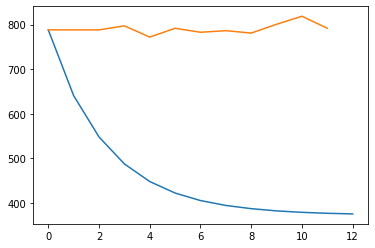

In [107]:
co2_air_pred = [data.loc[0, 'CO2_Air'], ]
co2_top_pred = [data.loc[0, 'CO2_Air'], ]

co2air = co2_air_pred[0]
co2top = co2air

for stamp in range(time_period):
    # Take out the data
    row = data.loc[stamp]
    exact_T_Air = row.T_Air
    exact_T_Out = row.T_Out
    exact_v_Wind = row.v_Wind

    # Load into dx
    A = dx(exact_T_Air, exact_T_Out, exact_v_Wind)
    # This returns approximations
    B = rk4(A, co2air, co2top, 1, 300)

    co2_air_pred.append(B[0])
    co2_top_pred.append(B[1])

    co2air = B[0]
    co2top = B[1]

plt.plot(co2_air_pred)
# plt.plot(data.CO2_Air)


In [115]:
save_to_csv = pd.DataFrame({
    'time' : pd.Series(np.arange(time_period + 1)),
    'CO2air' : pd.Series(co2_air_pred),
    'CO2top' : pd.Series(co2_top_pred)
})

save_to_csv.to_csv('predict.csv', index=False)